# DDDQN  (Double Dueling Deep Q Learning with Prioritized Experience Replay)  Doom🕹️
In this notebook we'll implement an agent <b>that plays Doom by using a Dueling Double Deep Q learning architecture with Prioritized Experience Replay.</b> <br>

Our agent playing Doom after 3 hours of training of **CPU**, remember that our agent needs about 2 days of **GPU** to have optimal score, we'll train from beginning to end the most important architectures (PPO with transfer):

<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/projects/doomdeathmatc.gif" alt="Doom Deathmatch"/>

But we can see that our agent **understand that he needs to kill enemies before being able to move forward (if he moves forward without killing ennemies he will be killed before getting the vest)**

# This is a notebook from [Deep Reinforcement Learning Course with Tensorflow](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/DRLC%20Environments.png" alt="Deep Reinforcement Course"/>
<br>
<p>  Deep Reinforcement Learning Course is a free series of articles and videos tutorials 🆕 about Deep Reinforcement Learning, where **we'll learn the main algorithms (Q-learning, Deep Q Nets, Dueling Deep Q Nets, Policy Gradients, A2C, Proximal Policy Gradients…), and how to implement them with Tensorflow.**
<br><br>
    
📜The articles explain the architectures from the big picture to the mathematical details behind them.
<br>
📹 The videos explain how to build the agents with Tensorflow </b></p>
<br>
This course will give you a **solid foundation for understanding and implementing the future state of the art algorithms**. And, you'll build a strong professional portfolio by creating **agents that learn to play awesome environments**: Doom© 👹, Space invaders 👾, Outrun, Sonic the Hedgehog©, Michael Jackson’s Moonwalker, agents that will be able to navigate in 3D environments with DeepMindLab (Quake) and able to walk with Mujoco. 
<br><br>
</p> 

## 📚 The complete [Syllabus HERE](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)


## Any questions 👨‍💻
<p> If you have any questions, feel free to ask me: </p>
<p> 📧: <a href="mailto:hello@simoninithomas.com">hello@simoninithomas.com</a>  </p>
<p> Github: https://github.com/simoninithomas/Deep_reinforcement_learning_Course </p>
<p> 🌐 : https://simoninithomas.github.io/Deep_reinforcement_learning_Course/ </p>
<p> Twitter: <a href="https://twitter.com/ThomasSimonini">@ThomasSimonini</a> </p>
<p> Don't forget to <b> follow me on <a href="https://twitter.com/ThomasSimonini">twitter</a>, <a href="https://github.com/simoninithomas/Deep_reinforcement_learning_Course">github</a> and <a href="https://medium.com/@thomassimonini">Medium</a> to be alerted of the new articles that I publish </b></p>
    
## How to help  🙌
3 ways:
- **Clap our articles and like our videos a lot**:Clapping in Medium means that you really like our articles. And the more claps we have, the more our article is shared Liking our videos help them to be much more visible to the deep learning community.
- **Share and speak about our articles and videos**: By sharing our articles and videos you help us to spread the word. 
- **Improve our notebooks**: if you found a bug or **a better implementation** you can send a pull request.
<br>

## Important note 🤔
<b> You can run it on your computer but it's better to run it on GPU based services</b>, personally I use Microsoft Azure and their Deep Learning Virtual Machine (they offer 170$)
https://azuremarketplace.microsoft.com/en-us/marketplace/apps/microsoft-ads.dsvm-deep-learning
<br>
⚠️ I don't have any business relations with them. I just loved their excellent customer service.

If you have some troubles to use Microsoft Azure follow the explainations of this excellent article here (without last the part fast.ai): https://medium.com/@manikantayadunanda/setting-up-deeplearning-machine-and-fast-ai-on-azure-a22eb6bd6429

## Prerequisites 🏗️
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- Deep Q-Learning [Article](https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8)
- Improvments in Deep Q-learning [Article]()
- You can follow this notebook using my [video tutorial](https://www.youtube.com/embed/-Ynjw0Vl3i4?showinfo=0)

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-Ynjw0Vl3i4?showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

## Step 1: Import the libraries 📚

In [1]:
import tensorflow as tf      # Deep Learning library
import numpy as np           # Handle matrices
from vizdoom import *        # Doom Environment

import random                # Handling random number generation
import time                  # Handling time calculation
from skimage import transform# Help us to preprocess the frames

from collections import deque# Ordered collection with ends
import matplotlib.pyplot as plt # Display graphs

import warnings # This ignore all the warning messages that are normally printed during the training because of skiimage
warnings.filterwarnings('ignore') 

## Step 2: Create our environment 🎮
- Now that we imported the libraries/dependencies, we will create our environment.
- Doom environment takes:
    - A `configuration file` that **handle all the options** (size of the frame, possible actions...)
    - A `scenario file`: that **generates the correct scenario** (in our case basic **but you're invited to try other scenarios**).
- Note: We have 7 possible actions: turn left, turn right, move left, move right, shoot (attack)...`[[0,0,0,0,1]...]` so we don't need to do one hot encoding (thanks to <a href="https://stackoverflow.com/users/2237916/silgon">silgon</a> for figuring out). 

### Our environment
<img src="https://simoninithomas.github.io/Deep_reinforcement_learning_Course/assets/img/video%20projects/deadlycorridor.png" style="max-width:500px;" alt="Vizdoom deadly corridor"/>

The purpose of this scenario is to teach the agent to navigate towards his fundamental goal (the vest) and make sure he survives at the same time.

- Map is a corridor with shooting monsters on both sides (6 monsters in total). 
- A green vest is placed at the oposite end of the corridor. 
- **Reward is proportional (negative or positive) to change of the distance between the player and the vest.** 
- If player ignores monsters on the sides and runs straight for the vest he will be killed somewhere along the way. 
- To ensure this behavior doom_skill = 5 (config) is needed.

<br>
REWARDS:

- +dX for getting closer to the vest. -dX for getting further from the vest.
- death penalty = 100

In [2]:
"""
Here we create our environment
"""
def create_environment():
    game = DoomGame()
    
    # Load the correct configuration
    game.load_config("/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/vizdoom/scenarios/deadly_corridor.cfg")
    
    # Load the correct scenario (in our case deadly_corridor scenario)
    game.set_doom_scenario_path("/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/vizdoom/scenarios/deadly_corridor.wad")
    
    game.init()

    # Here we create an hot encoded version of our actions (5 possible actions)
    # possible_actions = [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0]...]
    possible_actions = np.identity(7,dtype=int).tolist()
    
    return game, possible_actions

In [3]:
game, possible_actions = create_environment()

## Step 3: Define the preprocessing functions ⚙️
### preprocess_frame
Preprocessing is an important step, <b>because we want to reduce the complexity of our states to reduce the computation time needed for training.</b>
<br><br>
Our steps:
- Grayscale each of our frames (because <b> color does not add important information </b>). But this is already done by the config file.
- Crop the screen (in our case we remove the roof because it contains no information)
- We normalize pixel values
- Finally we resize the preprocessed frame

In [16]:
"""
    preprocess_frame:
    Take a frame.
    Resize it.
        __________________
        |                 |
        |                 |
        |                 |
        |                 |
        |_________________|
        
        to
        _____________
        |            |
        |            |
        |            |
        |____________|
    Normalize it.
    
    return preprocessed_frame
    
    """
def preprocess_frame(frame):
    # Crop the screen (remove part that contains no information)
    # [Up: Down, Left: right]
    frame = np.mean(frame,0)
    cropped_frame = frame[15:-5,20:-20]
    
    # Normalize Pixel Values
    normalized_frame = cropped_frame/255.0
    
    # Resize
    preprocessed_frame = transform.resize(cropped_frame, [75,90])
    plt.imshow(preprocessed_frame)
    
    
    return preprocessed_frame # 100x120x1 frame

### stack_frames
👏 This part was made possible thanks to help of <a href="https://github.com/Miffyli">Anssi</a><br>

As explained in this really <a href="https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/">  good article </a> we stack frames.

Stacking frames is really important because it helps us to **give have a sense of motion to our Neural Network.**

- First we preprocess frame
- Then we append the frame to the deque that automatically **removes the oldest frame**
- Finally we **build the stacked state**

This is how work stack:
- For the first frame, we feed 4 frames
- At each timestep, **we add the new frame to deque and then we stack them to form a new stacked frame**
- And so on
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/DQN/Space%20Invaders/assets/stack_frames.png" alt="stack">
- If we're done, **we create a new stack with 4 new frames (because we are in a new episode)**.

In [5]:
stack_size = 4 # We stack 4 frames

# Initialize deque with zero-images one array for each image
stacked_frames  =  deque([np.zeros((100,120), dtype=np.int) for i in range(stack_size)], maxlen=4) 

def stack_frames(stacked_frames, state, is_new_episode):
    # Preprocess frame
    frame = preprocess_frame(state)
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque([np.zeros((100,120), dtype=np.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)

    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2) 
    
    return stacked_state, stacked_frames

## Step 4: Set up our hyperparameters ⚗️
In this part we'll set up our different hyperparameters. But when you implement a Neural Network by yourself you will **not implement hyperparamaters at once but progressively**.

- First, you begin by defining the neural networks hyperparameters when you implement the model.
- Then, you'll add the training hyperparameters when you implement the training algorithm.

In [6]:
### MODEL HYPERPARAMETERS
state_size = [100,120,4]      # Our input is a stack of 4 frames hence 100x120x4 (Width, height, channels) 
action_size = game.get_available_buttons_size()              # 7 possible actions
learning_rate =  0.00025      # Alpha (aka learning rate)

### TRAINING HYPERPARAMETERS
total_episodes = 5000         # Total episodes for training
max_steps = 5000              # Max possible steps in an episode
batch_size = 64             

# FIXED Q TARGETS HYPERPARAMETERS 
max_tau = 10000 #Tau is the C step where we update our target network

# EXPLORATION HYPERPARAMETERS for epsilon greedy strategy
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.00005            # exponential decay rate for exploration prob

# Q LEARNING hyperparameters
gamma = 0.95               # Discounting rate

### MEMORY HYPERPARAMETERS
## If you have GPU change to 1million
pretrain_length = 10000   # Number of experiences stored in the Memory when initialized for the first time
memory_size = 100000       # Number of experiences the Memory can keep

### MODIFY THIS TO FALSE IF YOU JUST WANT TO SEE THE TRAINED AGENT
training = True

## TURN THIS TO TRUE IF YOU WANT TO RENDER THE ENVIRONMENT
episode_render = False

## Step 5: Create our Dueling Double Deep Q-learning Neural Network model (aka DDDQN) 🧠
<img src="https://cdn-images-1.medium.com/max/1500/1*FkHqwA2eSGixdS-3dvVoMA.png" alt="Dueling Double Deep Q Learning Model" />
This is our Dueling Double Deep Q-learning model:
- We take a stack of 4 frames as input
- It passes through 3 convnets
- Then it is flatened
- Then it is passed through 2 streams
    - One that calculates V(s)
    - The other that calculates A(s,a)
- Finally an agregating layer
- It outputs a Q value for each actions

In [7]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="3" 
class DDDQNNet:
    def __init__(self, state_size, action_size, learning_rate, name):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.name = name
        
        
        # We use tf.variable_scope here to know which network we're using (DQN or target_net)
        # it will be useful when we will update our w- parameters (by copy the DQN parameters)
        with tf.variable_scope(self.name):
            
            # We create the placeholders
            # *state_size means that we take each elements of state_size in tuple hence is like if we wrote
            # [None, 100, 120, 4]
            self.inputs_ = tf.placeholder(tf.float32, [None, *state_size], name="inputs")
            
            #
            self.ISWeights_ = tf.placeholder(tf.float32, [None,1], name='IS_weights')
            
            self.actions_ = tf.placeholder(tf.float32, [None, action_size], name="actions_")
            
            # Remember that target_Q is the R(s,a) + ymax Qhat(s', a')
            self.target_Q = tf.placeholder(tf.float32, [None], name="target")
            
            """
            First convnet:
            CNN
            ELU
            """
            # Input is 100x120x4
            self.conv1 = tf.layers.conv2d(inputs = self.inputs_,
                                         filters = 32,
                                         kernel_size = [8,8],
                                         strides = [4,4],
                                         padding = "VALID",
                                          kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                         name = "conv1")
            
            self.conv1_out = tf.nn.elu(self.conv1, name="conv1_out")
            
            
            """
            Second convnet:
            CNN
            ELU
            """
            self.conv2 = tf.layers.conv2d(inputs = self.conv1_out,
                                 filters = 64,
                                 kernel_size = [4,4],
                                 strides = [2,2],
                                 padding = "VALID",
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 name = "conv2")

            self.conv2_out = tf.nn.elu(self.conv2, name="conv2_out")
            
            
            """
            Third convnet:
            CNN
            ELU
            """
            self.conv3 = tf.layers.conv2d(inputs = self.conv2_out,
                                 filters = 128,
                                 kernel_size = [4,4],
                                 strides = [2,2],
                                 padding = "VALID",
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 name = "conv3")

            self.conv3_out = tf.nn.elu(self.conv3, name="conv3_out")
            
            
            self.flatten = tf.layers.flatten(self.conv3_out)
            
            
            ## Here we separate into two streams
            # The one that calculate V(s)
            self.value_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 512,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value_fc")
            
            self.value = tf.layers.dense(inputs = self.value_fc,
                                        units = 1,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="value")
            
            # The one that calculate A(s,a)
            self.advantage_fc = tf.layers.dense(inputs = self.flatten,
                                  units = 512,
                                  activation = tf.nn.elu,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantage_fc")
            
            self.advantage = tf.layers.dense(inputs = self.advantage_fc,
                                        units = self.action_size,
                                        activation = None,
                                        kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                name="advantages")
            
            # Agregating layer
            # Q(s,a) = V(s) + (A(s,a) - 1/|A| * sum A(s,a'))
            self.output = self.value + tf.subtract(self.advantage, tf.reduce_mean(self.advantage, axis=1, keepdims=True))
              
            # Q is our predicted Q value.
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions_), axis=1)
            
            # The loss is modified because of PER 
            self.absolute_errors = tf.abs(self.target_Q - self.Q)# for updating Sumtree
            
            self.loss = tf.reduce_mean(self.ISWeights_ * tf.squared_difference(self.target_Q, self.Q))
            
            self.optimizer = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)

In [8]:
# Reset the graph
tf.reset_default_graph()

# Instantiate the DQNetwork
DQNetwork = DDDQNNet(state_size, action_size, learning_rate, name="DQNetwork")

# Instantiate the target network
TargetNetwork = DDDQNNet(state_size, action_size, learning_rate, name="TargetNetwork")

## Step 6: Prioritized Experience Replay 🔁
Now that we create our Neural Network, **we need to implement the Prioritized Experience Replay method.** <br>

As explained in the article, **we can't use a simple array to do that because sampling from it will be not efficient, so we use a binary tree data type (in a binary tree each node has no + than 2 children).** More precisely, a sumtree, which is a binary tree where parents nodes are the sum of the children nodes.

If you don't know what is a binary tree check this awesome video https://www.youtube.com/watch?v=oSWTXtMglKE


This SumTree implementation was taken from Morvan Zhou in his chinese course about Reinforcement Learning

To summarize:
- **Step 1**: We construct a SumTree, which is a Binary Sum tree where leaves contains the priorities and a data array where index points to the index of leaves.
    <img src="https://cdn-images-1.medium.com/max/1200/1*Go9DNr7YY-wMGdIQ7HQduQ.png" alt="SumTree"/>
    <br><br>
    - **def __init__**: Initialize our SumTree data object with all nodes = 0 and data (data array) with all = 0.
    - **def add**: add our priority score in the sumtree leaf and experience (S, A, R, S', Done) in data.
    - **def update**: we update the leaf priority score and propagate through tree.
    - **def get_leaf**: retrieve priority score, index and experience associated with a leaf.
    - **def total_priority**: get the root node value to calculate the total priority score of our replay buffer.
<br><br>
- **Step 2**: We create a Memory object that will contain our sumtree and data.
    - **def __init__**: generates our sumtree and data by instantiating the SumTree object.
    - **def store**: we store a new experience in our tree. Each new experience will **have priority = max_priority** (and then this priority will be corrected during the training (when we'll calculating the TD error hence the priority score).
    - **def sample**:
         - First, to sample a minibatch of k size, the range [0, priority_total] is / into k ranges.
         - Then a value is uniformly sampled from each range
         - We search in the sumtree, the experience where priority score correspond to sample values are retrieved from.
         - Then, we calculate IS weights for each minibatch element
    - **def update_batch**: update the priorities on the tree

In [9]:
class SumTree(object):
    """
    This SumTree code is modified version of Morvan Zhou: 
    https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow/blob/master/contents/5.2_Prioritized_Replay_DQN/RL_brain.py
    """
    data_pointer = 0
    
    """
    Here we initialize the tree with all nodes = 0, and initialize the data with all values = 0
    """
    def __init__(self, capacity):
        self.capacity = capacity # Number of leaf nodes (final nodes) that contains experiences
        
        # Generate the tree with all nodes values = 0
        # To understand this calculation (2 * capacity - 1) look at the schema above
        # Remember we are in a binary node (each node has max 2 children) so 2x size of leaf (capacity) - 1 (root node)
        # Parent nodes = capacity - 1
        # Leaf nodes = capacity
        self.tree = np.zeros(2 * capacity - 1)
        
        """ tree:
            0
           / \
          0   0
         / \ / \
        0  0 0  0  [Size: capacity] it's at this line that there is the priorities score (aka pi)
        """
        
        # Contains the experiences (so the size of data is capacity)
        self.data = np.zeros(capacity, dtype=object)
    
    
    """
    Here we add our priority score in the sumtree leaf and add the experience in data
    """
    def add(self, priority, data):
        # Look at what index we want to put the experience
        tree_index = self.data_pointer + self.capacity - 1
        
        """ tree:
            0
           / \
          0   0
         / \ / \
tree_index  0 0  0  We fill the leaves from left to right
        """
        
        # Update data frame
        self.data[self.data_pointer] = data
        
        # Update the leaf
        self.update (tree_index, priority)
        
        # Add 1 to data_pointer
        self.data_pointer += 1
        
        if self.data_pointer >= self.capacity:  # If we're above the capacity, you go back to first index (we overwrite)
            self.data_pointer = 0
            
    
    """
    Update the leaf priority score and propagate the change through tree
    """
    def update(self, tree_index, priority):
        # Change = new priority score - former priority score
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        
        # then propagate the change through tree
        while tree_index != 0:    # this method is faster than the recursive loop in the reference code
            
            """
            Here we want to access the line above
            THE NUMBERS IN THIS TREE ARE THE INDEXES NOT THE PRIORITY VALUES
            
                0
               / \
              1   2
             / \ / \
            3  4 5  [6] 
            
            If we are in leaf at index 6, we updated the priority score
            We need then to update index 2 node
            So tree_index = (tree_index - 1) // 2
            tree_index = (6-1)//2
            tree_index = 2 (because // round the result)
            """
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change
    
    
    """
    Here we get the leaf_index, priority value of that leaf and experience associated with that index
    """
    def get_leaf(self, v):
        """
        Tree structure and array storage:
        Tree index:
             0         -> storing priority sum
            / \
          1     2
         / \   / \
        3   4 5   6    -> storing priority for experiences
        Array type for storing:
        [0,1,2,3,4,5,6]
        """
        parent_index = 0
        
        while True: # the while loop is faster than the method in the reference code
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            
            # If we reach bottom, end the search
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
            
            else: # downward search, always search for a higher priority node
                
                if v <= self.tree[left_child_index]:
                    parent_index = left_child_index
                    
                else:
                    v -= self.tree[left_child_index]
                    parent_index = right_child_index
            
        data_index = leaf_index - self.capacity + 1

        return leaf_index, self.tree[leaf_index], self.data[data_index]
    
    @property
    def total_priority(self):
        return self.tree[0] # Returns the root node

Here we don't use deque anymore

In [10]:
class Memory(object):  # stored as ( s, a, r, s_ ) in SumTree
    """
    This SumTree code is modified version and the original code is from:
    https://github.com/jaara/AI-blog/blob/master/Seaquest-DDQN-PER.py
    """
    PER_e = 0.01  # Hyperparameter that we use to avoid some experiences to have 0 probability of being taken
    PER_a = 0.6  # Hyperparameter that we use to make a tradeoff between taking only exp with high priority and sampling randomly
    PER_b = 0.4  # importance-sampling, from initial value increasing to 1
    
    PER_b_increment_per_sampling = 0.001
    
    absolute_error_upper = 1.  # clipped abs error

    def __init__(self, capacity):
        # Making the tree 
        """
        Remember that our tree is composed of a sum tree that contains the priority scores at his leaf
        And also a data array
        We don't use deque because it means that at each timestep our experiences change index by one.
        We prefer to use a simple array and to overwrite when the memory is full.
        """
        self.tree = SumTree(capacity)
        
    """
    Store a new experience in our tree
    Each new experience have a score of max_prority (it will be then improved when we use this exp to train our DDQN)
    """
    def store(self, experience):
        # Find the max priority
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        
        # If the max priority = 0 we can't put priority = 0 since this exp will never have a chance to be selected
        # So we use a minimum priority
        if max_priority == 0:
            max_priority = self.absolute_error_upper
        
        self.tree.add(max_priority, experience)   # set the max p for new p

        
    """
    - First, to sample a minibatch of k size, the range [0, priority_total] is / into k ranges.
    - Then a value is uniformly sampled from each range
    - We search in the sumtree, the experience where priority score correspond to sample values are retrieved from.
    - Then, we calculate IS weights for each minibatch element
    """
    def sample(self, n):
        # Create a sample array that will contains the minibatch
        memory_b = []
        
        b_idx, b_ISWeights = np.empty((n,), dtype=np.int32), np.empty((n, 1), dtype=np.float32)
        
        # Calculate the priority segment
        # Here, as explained in the paper, we divide the Range[0, ptotal] into n ranges
        priority_segment = self.tree.total_priority / n       # priority segment
    
        # Here we increasing the PER_b each time we sample a new minibatch
        self.PER_b = np.min([1., self.PER_b + self.PER_b_increment_per_sampling])  # max = 1
        
        # Calculating the max_weight
        p_min = np.min(self.tree.tree[-self.tree.capacity:]) / self.tree.total_priority
        max_weight = (p_min * n) ** (-self.PER_b)
        
        for i in range(n):
            """
            A value is uniformly sample from each range
            """
            a, b = priority_segment * i, priority_segment * (i + 1)
            value = np.random.uniform(a, b)
            
            """
            Experience that correspond to each value is retrieved
            """
            index, priority, data = self.tree.get_leaf(value)
            
            #P(j)
            sampling_probabilities = priority / self.tree.total_priority
            
            #  IS = (1/N * 1/P(i))**b /max wi == (N*P(i))**-b  /max wi
            b_ISWeights[i, 0] = np.power(n * sampling_probabilities, -self.PER_b)/ max_weight
                                   
            b_idx[i]= index
            
            experience = [data]
            
            memory_b.append(experience)
        
        return b_idx, memory_b, b_ISWeights
    
    """
    Update the priorities on the tree
    """
    def batch_update(self, tree_idx, abs_errors):
        abs_errors += self.PER_e  # convert to abs and avoid 0
        clipped_errors = np.minimum(abs_errors, self.absolute_error_upper)
        ps = np.power(clipped_errors, self.PER_a)

        for ti, p in zip(tree_idx, ps):
            self.tree.update(ti, p)

Here we'll **deal with the empty memory problem**: we pre-populate our memory by taking random actions and storing the experience.

83


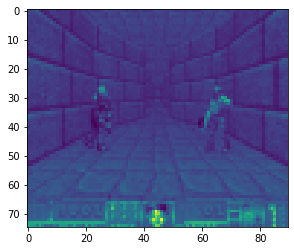

In [17]:
from IPython.display import clear_output
# Instantiate memory
memory = Memory(memory_size)

# Render the environment
game.init()
game.new_episode()

for i in range(pretrain_length):
    clear_output()
    print(i)
    # If it's the first step
    if i == 0:
        # First we need a state
        state = game.get_state().screen_buffer
        state, stacked_frames = stack_frames(stacked_frames, state, True)
    
    # Random action
    action = random.choice(possible_actions)
    
    # Get the rewards
    reward = game.make_action(action)
    
    # Look if the episode is finished
    done = game.is_episode_finished()

    # If we're dead
    if done:
        # We finished the episode
        next_state = np.zeros(state.shape)
        
        # Add experience to memory
        #experience = np.hstack((state, [action, reward], next_state, done))
        
        experience = state, action, reward, next_state, done
        memory.store(experience)
        
        # Start a new episode
        game.new_episode()
        
        # First we need a state
        state = game.get_state().screen_buffer
        
        # Stack the frames
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        break
    else:
        # Get the next state
        next_state = game.get_state().screen_buffer
        next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
        
        # Add experience to memory
        experience = state, action, reward, next_state, done
        memory.store(experience)
        
        # Our state is now the next_state
        state = next_state

## Step 7: Set up Tensorboard 📊
For more information about tensorboard, please watch this <a href="https://www.youtube.com/embed/eBbEDRsCmv4">excellent 30min tutorial</a> <br><br>
To launch tensorboard : `tensorboard --logdir=/tensorboard/dddqn/1`

In [32]:
# Setup TensorBoard Writer
writer = tf.summary.FileWriter("tensorboard/dddqn")

## Losses
tf.summary.scalar("Loss", DQNetwork.loss)

write_op = tf.summary.merge_all()

## Step 8: Train our Agent 🏃‍♂️

Our algorithm:
<br>
* Initialize the weights for DQN
* Initialize target value weights w- <- w
* Init the environment
* Initialize the decay rate (that will use to reduce epsilon) 
<br><br>
* **For** episode to max_episode **do** 
    * Make new episode
    * Set step to 0
    * Observe the first state $s_0$
    <br><br>
    * **While** step < max_steps **do**:
        * Increase decay_rate
        * With $\epsilon$ select a random action $a_t$, otherwise select $a_t = \mathrm{argmax}_a Q(s_t,a)$
        * Execute action $a_t$ in simulator and observe reward $r_{t+1}$ and new state $s_{t+1}$
        * Store transition $<s_t, a_t, r_{t+1}, s_{t+1}>$ in memory $D$
        
        * Sample random mini-batch from $D$: $<s, a, r, s'>$
        * Set target $\hat{Q} = r$ if the episode ends at $+1$, otherwise set $\hat{Q} = r + \gamma Q(s',argmax_{a'}{Q(s', a', w), w^-)}$
        * Make a gradient descent step with loss $(\hat{Q} - Q(s, a))^2$
        * Every C steps, reset: $w^- \leftarrow w$
    * **endfor**
    <br><br>
* **endfor**

    

In [11]:
"""
This function will do the part
With ϵ select a random action atat, otherwise select at=argmaxaQ(st,a)
"""
def predict_action(explore_start, explore_stop, decay_rate, decay_step, state, actions):
    ## EPSILON GREEDY STRATEGY
    # Choose action a from state s using epsilon greedy.
    ## First we randomize a number
    exp_exp_tradeoff = np.random.rand()

    # Here we'll use an improved version of our epsilon greedy strategy used in Q-learning notebook
    explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
    
    if (explore_probability > exp_exp_tradeoff):
        # Make a random action (exploration)
        action = random.choice(possible_actions)
        
    else:
        # Get action from Q-network (exploitation)
        # Estimate the Qs values state
        Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state.reshape((1, *state.shape))})
        
        # Take the biggest Q value (= the best action)
        choice = np.argmax(Qs)
        action = possible_actions[int(choice)]
                
    return action, explore_probability

In [12]:
# This function helps us to copy one set of variables to another
# In our case we use it when we want to copy the parameters of DQN to Target_network
# Thanks of the very good implementation of Arthur Juliani https://github.com/awjuliani
def update_target_graph():
    
    # Get the parameters of our DQNNetwork
    from_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DQNetwork")
    
    # Get the parameters of our Target_network
    to_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "TargetNetwork")

    op_holder = []
    
    # Update our target_network parameters with DQNNetwork parameters
    for from_var,to_var in zip(from_vars,to_vars):
        op_holder.append(to_var.assign(from_var))
    return op_holder

In [ ]:
# Saver will help us to save our model
#saver = tf.train.Saver()

if training == True:
    with tf.Session() as sess:
        # Initialize the variables
        sess.run(tf.global_variables_initializer())
        
        # Initialize the decay rate (that will use to reduce epsilon) 
        decay_step = 0
        
        # Set tau = 0
        tau = 0

        # Init the game
        game.init()
        
        saver = tf.train.Saver()
        saver.restore(sess, "./models/model.ckpt")
        # Update the parameters of our TargetNetwork with DQN_weights
        update_target = update_target_graph()
        sess.run(update_target)
        
        for episode in range(total_episodes):
            # Set step to 0
            step = 0
            
            # Initialize the rewards of the episode
            episode_rewards = []
            
            # Make a new episode and observe the first state
            game.new_episode()
            
            state = game.get_state().screen_buffer
            
            # Remember that stack frame function also call our preprocess function.
            state, stacked_frames = stack_frames(stacked_frames, state, True)
        
            while step < max_steps:
                step += 1
                
                # Increase the C step
                tau += 1
                
                # Increase decay_step
                decay_step +=1
                
                # With ϵ select a random action atat, otherwise select a = argmaxQ(st,a)
                action, explore_probability = predict_action(explore_start, explore_stop, decay_rate, decay_step, state, possible_actions)

                # Do the action
                reward = game.make_action(action)

                # Look if the episode is finished
                done = game.is_episode_finished()
                
                # Add the reward to total reward
                episode_rewards.append(reward)

                # If the game is finished
                if done:
                    # the episode ends so no next state
                    next_state = np.zeros((1,120,140), dtype=np.int)
                    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)

                    # Set step = max_steps to end the episode
                    step = max_steps

                    # Get the total reward of the episode
                    total_reward = np.sum(episode_rewards)

                    print('Episode: {}'.format(episode),
                              'Total reward: {}'.format(total_reward),
                              'Training loss: {:.4f}'.format(loss),
                              'Explore P: {:.4f}'.format(explore_probability))

                    # Add experience to memory
                    experience = state, action, reward, next_state, done
                    memory.store(experience)

                else:
                    # Get the next state
                    next_state = game.get_state().screen_buffer
                    
                    # Stack the frame of the next_state
                    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
                    

                    # Add experience to memory
                    experience = state, action, reward, next_state, done
                    memory.store(experience)
                    
                    # st+1 is now our current state
                    state = next_state


                ### LEARNING PART            
                # Obtain random mini-batch from memory
                tree_idx, batch, ISWeights_mb = memory.sample(batch_size)
                
                states_mb = np.array([each[0][0] for each in batch], ndmin=3)
                actions_mb = np.array([each[0][1] for each in batch])
                rewards_mb = np.array([each[0][2] for each in batch]) 
                next_states_mb = np.array([each[0][3] for each in batch], ndmin=3)
                dones_mb = np.array([each[0][4] for each in batch])

                target_Qs_batch = []

                
                ### DOUBLE DQN Logic
                # Use DQNNetwork to select the action to take at next_state (a') (action with the highest Q-value)
                # Use TargetNetwork to calculate the Q_val of Q(s',a')
                
                # Get Q values for next_state 
                q_next_state = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: next_states_mb})
                
                # Calculate Qtarget for all actions that state
                q_target_next_state = sess.run(TargetNetwork.output, feed_dict = {TargetNetwork.inputs_: next_states_mb})
                
                
                # Set Q_target = r if the episode ends at s+1, otherwise set Q_target = r + gamma * Qtarget(s',a') 
                for i in range(0, len(batch)):
                    terminal = dones_mb[i]
                    
                    # We got a'
                    action = np.argmax(q_next_state[i])

                    # If we are in a terminal state, only equals reward
                    if terminal:
                        target_Qs_batch.append(rewards_mb[i])
                        
                    else:
                        # Take the Qtarget for action a'
                        target = rewards_mb[i] + gamma * q_target_next_state[i][action]
                        target_Qs_batch.append(target)
                        

                targets_mb = np.array([each for each in target_Qs_batch])

                
                _, loss, absolute_errors = sess.run([DQNetwork.optimizer, DQNetwork.loss, DQNetwork.absolute_errors],
                                    feed_dict={DQNetwork.inputs_: states_mb,
                                               DQNetwork.target_Q: targets_mb,
                                               DQNetwork.actions_: actions_mb,
                                              DQNetwork.ISWeights_: ISWeights_mb})
              
                
                
                # Update priority
                memory.batch_update(tree_idx, absolute_errors)
                
                
                # Write TF Summaries
                summary = sess.run(write_op, feed_dict={DQNetwork.inputs_: states_mb,
                                                   DQNetwork.target_Q: targets_mb,
                                                   DQNetwork.actions_: actions_mb,
                                              DQNetwork.ISWeights_: ISWeights_mb})
                writer.add_summary(summary, episode)
                writer.flush()
                
                if tau > max_tau:
                    # Update the parameters of our TargetNetwork with DQN_weights
                    update_target = update_target_graph()
                    sess.run(update_target)
                    tau = 0
                    print("Model updated")

            # Save model every 5 episodes
            if episode % 5 == 0:
                save_path = saver.save(sess, "./models/model.ckpt")
                print("Model Saved")

INFO:tensorflow:Restoring parameters from ./models/model.ckpt
Episode: 0 Total reward: -108.68434143066406 Training loss: 0.0000 Explore P: 0.9933
Model Saved
Episode: 1 Total reward: -115.19001770019531 Training loss: 0.0000 Explore P: 0.9892
Episode: 2 Total reward: -105.44499206542969 Training loss: 0.0000 Explore P: 0.9855
Episode: 3 Total reward: -93.06541442871094 Training loss: 0.0000 Explore P: 0.9800
Episode: 4 Total reward: -100.5716552734375 Training loss: 0.0000 Explore P: 0.9759
Episode: 5 Total reward: -115.99882507324219 Training loss: 0.0000 Explore P: 0.9704
Model Saved
Episode: 6 Total reward: -101.0218505859375 Training loss: 0.0000 Explore P: 0.9665
Episode: 7 Total reward: -73.44865417480469 Training loss: 0.0000 Explore P: 0.9642
Episode: 8 Total reward: -115.96614074707031 Training loss: 0.0000 Explore P: 0.9592
Episode: 9 Total reward: -97.9586181640625 Training loss: 0.0000 Explore P: 0.9569
Episode: 10 Total reward: -108.1531982421875 Training loss: 0.0000 Exp

Episode: 0 Total reward: -89.26519775390625 Training loss: 0.6859 Explore P: 0.9919
Model Saved
Episode: 1 Total reward: -115.13249206542969 Training loss: 1.0044 Explore P: 0.9872
Episode: 2 Total reward: -88.6678466796875 Training loss: 30.3196 Explore P: 0.9760
Episode: 3 Total reward: -79.75584411621094 Training loss: 0.4285 Explore P: 0.9687
Episode: 4 Total reward: -112.888916015625 Training loss: 17.6260 Explore P: 0.9616
Episode: 5 Total reward: -72.01809692382812 Training loss: 0.3325 Explore P: 0.9566
Model Saved
Episode: 6 Total reward: -91.27947998046875 Training loss: 11.2775 Explore P: 0.9489
Episode: 7 Total reward: -96.70150756835938 Training loss: 0.8339 Explore P: 0.9412
Episode: 8 Total reward: -89.98007202148438 Training loss: 10.4413 Explore P: 0.9368
Episode: 9 Total reward: -78.67872619628906 Training loss: 13.1729 Explore P: 0.9292
Episode: 10 Total reward: -114.67742919921875 Training loss: 30.3574 Explore P: 0.9192
Model Saved
Episode: 11 Total reward: -96.40922546386719 Training loss: 1.3338 Explore P: 0.9128
Episode: 12 Total reward: -55.94306945800781 Training loss: 1.0281 Explore P: 0.9030
Episode: 13 Total reward: -90.61083984375 Training loss: 17.3349 Explore P: 0.8908
Episode: 14 Total reward: -110.54817199707031 Training loss: 11.5495 Explore P: 0.8845
Episode: 15 Total reward: -86.7437744140625 Training loss: 8.5952 Explore P: 0.8773
Model Saved
Episode: 16 Total reward: -108.89964294433594 Training loss: 1.6884 Explore P: 0.8730
Episode: 17 Total reward: -59.06085205078125 Training loss: 1.4325 Explore P: 0.8659
Episode: 18 Total reward: -102.50300598144531 Training loss: 1.0175 Explore P: 0.8593
Episode: 19 Total reward: -100.752685546875 Training loss: 7.5007 Explore P: 0.8556
Episode: 20 Total reward: -111.81524658203125 Training loss: 5.0652 Explore P: 0.8487
Model Saved
Episode: 21 Total reward: -104.21478271484375 Training loss: 1.5522 Explore P: 0.8395
Episode: 22 Total reward: -112.78564453125 Training loss: 5.5151 Explore P: 0.8359
Episode: 23 Total reward: -82.05340576171875 Training loss: 1.2886 Explore P: 0.8292
Episode: 24 Total reward: -111.15492248535156 Training loss: 0.5443 Explore P: 0.8225
Episode: 25 Total reward: -73.76707458496094 Training loss: 1.5218 Explore P: 0.8156
Model Saved
Episode: 26 Total reward: -93.35487365722656 Training loss: 0.9257 Explore P: 0.8088
Episode: 27 Total reward: -104.47758483886719 Training loss: 2.1761 Explore P: 0.8023
Episode: 28 Total reward: -81.60890197753906 Training loss: 0.5991 Explore P: 0.7958
Episode: 29 Total reward: -100.63589477539062 Training loss: 1.7395 Explore P: 0.7894
Episode: 30 Total reward: -88.62884521484375 Training loss: 8.3556 Explore P: 0.7830
Model Saved
Episode: 31 Total reward: -105.23612976074219 Training loss: 0.8298 Explore P: 0.7767
Episode: 32 Total reward: -111.5128173828125 Training loss: 0.6878 Explore P: 0.7711
Episode: 33 Total reward: -107.63644409179688 Training loss: 0.7860 Explore P: 0.7651
Episode: 34 Total reward: -99.78999328613281 Training loss: 1.9388 Explore P: 0.7567
Episode: 35 Total reward: -107.68731689453125 Training loss: 3.5948 Explore P: 0.7481
Model Saved
Episode: 36 Total reward: -112.137451171875 Training loss: 0.4563 Explore P: 0.7421
Episode: 37 Total reward: -50.57890319824219 Training loss: 0.5308 Explore P: 0.7361
Episode: 38 Total reward: -73.00382995605469 Training loss: 1.9759 Explore P: 0.7302
Episode: 39 Total reward: -80.82208251953125 Training loss: 0.2969 Explore P: 0.7243
Episode: 40 Total reward: -97.41578674316406 Training loss: 16.1484 Explore P: 0.7185
Model Saved
Episode: 41 Total reward: -77.568115234375 Training loss: 0.2420 Explore P: 0.7128
Episode: 42 Total reward: -103.93637084960938 Training loss: 0.1838 Explore P: 0.7026
Episode: 43 Total reward: -81.61286926269531 Training loss: 0.3259 Explore P: 0.6948
Episode: 44 Total reward: -91.02716064453125 Training loss: 0.3337 Explore P: 0.6859
Episode: 45 Total reward: -98.70729064941406 Training loss: 2.1673 Explore P: 0.6804
Model Saved
Episode: 46 Total reward: -115.98574829101562 Training loss: 14.9863 Explore P: 0.6726
Episode: 47 Total reward: -100.81024169921875 Training loss: 2.0342 Explore P: 0.6654
Episode: 48 Total reward: -60.25152587890625 Training loss: 0.2753 Explore P: 0.6569
Episode: 49 Total reward: -67.41098022460938 Training loss: 0.3018 Explore P: 0.6486
Episode: 50 Total reward: -105.46267700195312 Training loss: 1.0995 Explore P: 0.6413
Model Saved
Episode: 51 Total reward: -73.07460021972656 Training loss: 0.1813 Explore P: 0.6362
Episode: 52 Total reward: -96.30844116210938 Training loss: 0.2939 Explore P: 0.6310
Episode: 53 Total reward: -94.21073913574219 Training loss: 0.4776 Explore P: 0.6284
Episode: 54 Total reward: -65.328125 Training loss: 0.2104 Explore P: 0.6233
Episode: 55 Total reward: -66.21479797363281 Training loss: 3.2012 Explore P: 0.6183
Model Saved
Episode: 56 Total reward: -94.83515930175781 Training loss: 0.5179 Explore P: 0.6136
Episode: 57 Total reward: -92.63566589355469 Training loss: 7.6108 Explore P: 0.6068
Episode: 58 Total reward: -114.22836303710938 Training loss: 0.1981 Explore P: 0.5979
Episode: 59 Total reward: -109.301025390625 Training loss: 0.1633 Explore P: 0.5931
Episode: 60 Total reward: -69.18382263183594 Training loss: 0.3027 Explore P: 0.5883
Model Saved
Episode: 61 Total reward: -96.5882568359375 Training loss: 0.2388 Explore P: 0.5856
Episode: 62 Total reward: -115.95585632324219 Training loss: 0.2598 Explore P: 0.5815
Episode: 63 Total reward: -91.42893981933594 Training loss: 3.1792 Explore P: 0.5768
Episode: 64 Total reward: -78.47196960449219 Training loss: 0.1737 Explore P: 0.5722
Episode: 65 Total reward: -33.51860046386719 Training loss: 16.5782 Explore P: 0.5676
Model Saved
Episode: 66 Total reward: -52.46026611328125 Training loss: 0.7277 Explore P: 0.5630
Episode: 67 Total reward: -104.60054016113281 Training loss: 0.1622 Explore P: 0.5585
Episode: 68 Total reward: -77.99497985839844 Training loss: 2.5138 Explore P: 0.5540
Episode: 69 Total reward: -54.47041320800781 Training loss: 0.1590 Explore P: 0.5496
Episode: 70 Total reward: -63.22991943359375 Training loss: 0.1965 Explore P: 0.5452
Model Saved
Episode: 71 Total reward: -87.78546142578125 Training loss: 0.3122 Explore P: 0.5375
Episode: 72 Total reward: -96.14764404296875 Training loss: 0.1515 Explore P: 0.5351
Episode: 73 Total reward: -69.32623291015625 Training loss: 2.8430 Explore P: 0.5308
Episode: 74 Total reward: -13.840484619140625 Training loss: 0.2721 Explore P: 0.5266
Episode: 75 Total reward: -89.6734619140625 Training loss: 0.1506 Explore P: 0.5213
Model Saved
Episode: 76 Total reward: -64.53419494628906 Training loss: 1.8367 Explore P: 0.5171
Episode: 77 Total reward: -106.41300964355469 Training loss: 0.3183 Explore P: 0.5072
Episode: 78 Total reward: -50.4837646484375 Training loss: 0.2255 Explore P: 0.5033
Episode: 79 Total reward: -34.91241455078125 Training loss: 0.1923 Explore P: 0.4976
Episode: 80 Total reward: -115.21119689941406 Training loss: 0.1336 Explore P: 0.4950
Model Saved
Episode: 81 Total reward: -73.21771240234375 Training loss: 0.1376 Explore P: 0.4911
Episode: 82 Total reward: -62.74360656738281 Training loss: 0.6687 Explore P: 0.4871
Episode: 83 Total reward: -15.30194091796875 Training loss: 0.1503 Explore P: 0.4778
Episode: 84 Total reward: -74.79470825195312 Training loss: 0.1727 Explore P: 0.4740
Episode: 85 Total reward: -54.167205810546875 Training loss: 0.1432 Explore P: 0.4702
Model Saved
Episode: 86 Total reward: -62.83433532714844 Training loss: 0.1632 Explore P: 0.4665
Episode: 87 Total reward: -82.97991943359375 Training loss: 0.1923 Explore P: 0.4644
Episode: 88 Total reward: -72.07733154296875 Training loss: 0.2274 Explore P: 0.4607
Episode: 89 Total reward: -55.19401550292969 Training loss: 0.1261 Explore P: 0.4570
Episode: 90 Total reward: -76.98689270019531 Training loss: 0.7601 Explore P: 0.4505
Model Saved
Episode: 91 Total reward: -65.32528686523438 Training loss: 0.3138 Explore P: 0.4469
Episode: 92 Total reward: -50.588714599609375 Training loss: 0.2203 Explore P: 0.4435
Episode: 93 Total reward: -70.39730834960938 Training loss: 1.2486 Explore P: 0.4415

Episode: 94 Total reward: 70.74258422851562 Training loss: 0.4045 Explore P: 0.4366
Episode: 95 Total reward: -11.190460205078125 Training loss: 0.2244 Explore P: 0.4331
Model Saved
Episode: 96 Total reward: -22.803070068359375 Training loss: 0.4332 Explore P: 0.4297
Episode: 97 Total reward: -43.600616455078125 Training loss: 2.4079 Explore P: 0.4265
Episode: 98 Total reward: -74.661376953125 Training loss: 0.3113 Explore P: 0.4246
Episode: 99 Total reward: -32.23060607910156 Training loss: 0.1899 Explore P: 0.4212
Episode: 100 Total reward: -66.32485961914062 Training loss: 0.1400 Explore P: 0.4167
Model Saved
Episode: 101 Total reward: -15.644882202148438 Training loss: 0.0826 Explore P: 0.4134
Episode: 102 Total reward: 44.1182861328125 Training loss: 0.1348 Explore P: 0.4101
Episode: 103 Total reward: -61.74578857421875 Training loss: 0.6734 Explore P: 0.4058
Episode: 104 Total reward: -87.16415405273438 Training loss: 0.2358 Explore P: 0.4026
Episode: 105 Total reward: -90.69143676757812 Training loss: 0.4390 Explore P: 0.3939
Model Saved
Episode: 106 Total reward: -56.23359680175781 Training loss: 0.1456 Explore P: 0.3908
Episode: 107 Total reward: -41.05461120605469 Training loss: 0.9647 Explore P: 0.3877
Episode: 108 Total reward: -1.7525482177734375 Training loss: 0.4109 Explore P: 0.3846
Episode: 109 Total reward: -37.95100402832031 Training loss: 0.2784 Explore P: 0.3815
Episode: 110 Total reward: -71.89024353027344 Training loss: 0.1012 Explore P: 0.3786
Model Saved
Episode: 111 Total reward: -72.90853881835938 Training loss: 1.4025 Explore P: 0.3756
Model updated
Episode: 112 Total reward: -56.199127197265625 Training loss: 7.5684 Explore P: 0.3727
Episode: 113 Total reward: -77.53300476074219 Training loss: 3.6123 Explore P: 0.3698
Episode: 114 Total reward: -50.253692626953125 Training loss: 6.0007 Explore P: 0.3668
Episode: 115 Total reward: 18.208023071289062 Training loss: 6.2701 Explore P: 0.3639
Model Saved
Episode: 116 Total reward: -74.686767578125 Training loss: 7.9382 Explore P: 0.3610
Episode: 117 Total reward: -76.70317077636719 Training loss: 3.9754 Explore P: 0.3593
Episode: 118 Total reward: 18.843551635742188 Training loss: 1.0298 Explore P: 0.3554
Episode: 119 Total reward: 1.3499298095703125 Training loss: 1.5573 Explore P: 0.3525
Episode: 120 Total reward: -0.566131591796875 Training loss: 0.4084 Explore P: 0.3497
Model Saved
Episode: 121 Total reward: 20.053070068359375 Training loss: 0.6762 Explore P: 0.3470
Episode: 122 Total reward: -79.74948120117188 Training loss: 0.5085 Explore P: 0.3443
Episode: 123 Total reward: -68.07794189453125 Training loss: 0.6844 Explore P: 0.3416
Episode: 124 Total reward: 20.166915893554688 Training loss: 0.2775 Explore P: 0.3389
Episode: 125 Total reward: -87.4755859375 Training loss: 0.3127 Explore P: 0.3364
Model Saved
Episode: 126 Total reward: -17.0537109375 Training loss: 0.3796 Explore P: 0.3337
Episode: 127 Total reward: 5.201812744140625 Training loss: 0.6150 Explore P: 0.3311
Episode: 128 Total reward: -32.572784423828125 Training loss: 0.2595 Explore P: 0.3285
Episode: 129 Total reward: -43.18853759765625 Training loss: 0.4992 Explore P: 0.3259
Episode: 130 Total reward: -84.01849365234375 Training loss: 0.3338 Explore P: 0.3226
Model Saved
Episode: 131 Total reward: -99.23286437988281 Training loss: 1.2294 Explore P: 0.3200
Episode: 132 Total reward: -27.938064575195312 Training loss: 0.9042 Explore P: 0.3175
Episode: 133 Total reward: 2.96868896484375 Training loss: 0.3110 Explore P: 0.3151
Episode: 134 Total reward: -49.97503662109375 Training loss: 0.4291 Explore P: 0.3119
Episode: 135 Total reward: 8.848037719726562 Training loss: 0.9113 Explore P: 0.3095
Model Saved
Episode: 136 Total reward: -78.30146789550781 Training loss: 1.1113 Explore P: 0.3064
Episode: 137 Total reward: -35.61848449707031 Training loss: 0.2758 Explore P: 0.3039
Episode: 138 Total reward: -80.23164367675781 Training loss: 1.1325 Explore P: 0.3015
Episode: 139 Total reward: -41.44696044921875 Training loss: 0.2293 Explore P: 0.2993
Episode: 140 Total reward: -63.55998229980469 Training loss: 0.5988 Explore P: 0.2969
Model Saved
Episode: 141 Total reward: -74.58718872070312 Training loss: 0.3622 Explore P: 0.2956
Episode: 142 Total reward: -44.1854248046875 Training loss: 0.8818 Explore P: 0.2933
Episode: 143 Total reward: -43.17417907714844 Training loss: 0.6441 Explore P: 0.2918
Episode: 144 Total reward: -35.05082702636719 Training loss: 0.1932 Explore P: 0.2885
Episode: 145 Total reward: 2.6080322265625 Training loss: 0.2974 Explore P: 0.2857
Model Saved
Episode: 146 Total reward: -75.66334533691406 Training loss: 0.2797 Explore P: 0.2828
Episode: 147 Total reward: -79.89767456054688 Training loss: 14.5457 Explore P: 0.2805
Episode: 148 Total reward: -65.21456909179688 Training loss: 0.7638 Explore P: 0.2783
Episode: 149 Total reward: 13.195510864257812 Training loss: 0.3936 Explore P: 0.2761
Episode: 150 Total reward: 60.77146911621094 Training loss: 1.1485 Explore P: 0.2739
Model Saved
Episode: 151 Total reward: -67.01502990722656 Training loss: 1.1541 Explore P: 0.2710
Episode: 152 Total reward: 7.119903564453125 Training loss: 0.4257 Explore P: 0.2689
Episode: 153 Total reward: 13.754486083984375 Training loss: 0.4931 Explore P: 0.2639
Episode: 154 Total reward: -67.7314453125 Training loss: 0.5301 Explore P: 0.2618
Episode: 155 Total reward: -61.25654602050781 Training loss: 0.3877 Explore P: 0.2599
Model Saved
Episode: 156 Total reward: -1.2131805419921875 Training loss: 0.3397 Explore P: 0.2579
Episode: 157 Total reward: -26.2254638671875 Training loss: 0.1870 Explore P: 0.2558
Episode: 158 Total reward: 71.63455200195312 Training loss: 0.3283 Explore P: 0.2538
Episode: 159 Total reward: -41.72747802734375 Training loss: 0.6035 Explore P: 0.2520
Episode: 160 Total reward: -75.83839416503906 Training loss: 0.5253 Explore P: 0.2488
Model Saved
Episode: 161 Total reward: 3.0420074462890625 Training loss: 0.8875 Explore P: 0.2468
Episode: 162 Total reward: -21.011383056640625 Training loss: 0.2739 Explore P: 0.2449
Episode: 163 Total reward: -19.587127685546875 Training loss: 1.2479 Explore P: 0.2431
Episode: 164 Total reward: -53.40458679199219 Training loss: 1.2350 Explore P: 0.2413
Episode: 165 Total reward: -59.686767578125 Training loss: 0.4527 Explore P: 0.2395
Model Saved
Episode: 166 Total reward: -53.43865966796875 Training loss: 12.8202 Explore P: 0.2384
Episode: 167 Total reward: 4.73968505859375 Training loss: 0.2532 Explore P: 0.2366
Episode: 168 Total reward: -42.3804931640625 Training loss: 0.6826 Explore P: 0.2347
Episode: 169 Total reward: -1.4572296142578125 Training loss: 0.5197 Explore P: 0.2329
Episode: 170 Total reward: -39.27558898925781 Training loss: 11.5407 Explore P: 0.2311
Model Saved
Episode: 171 Total reward: 8.362579345703125 Training loss: 0.2713 Explore P: 0.2295
Episode: 172 Total reward: 14.519943237304688 Training loss: 7.7963 Explore P: 0.2277
Episode: 173 Total reward: -58.884429931640625 Training loss: 0.3072 Explore P: 0.2259
Episode: 174 Total reward: -93.07179260253906 Training loss: 0.6735 Explore P: 0.2235
Episode: 175 Total reward: -60.440277099609375 Training loss: 0.6426 Explore P: 0.2218
Model Saved
Episode: 176 Total reward: 24.163375854492188 Training loss: 0.5932 Explore P: 0.2201
Episode: 177 Total reward: -74.15121459960938 Training loss: 0.1940 Explore P: 0.2191
Episode: 178 Total reward: -47.54103088378906 Training loss: 0.9826 Explore P: 0.2174
Episode: 179 Total reward: -88.96371459960938 Training loss: 0.6407 Explore P: 0.2157
Episode: 180 Total reward: 86.02571105957031 Training loss: 0.3157 Explore P: 0.2134
Model Saved
Episode: 181 Total reward: -8.269500732421875 Training loss: 1.0492 Explore P: 0.2118
Episode: 182 Total reward: 37.916839599609375 Training loss: 0.3531 Explore P: 0.2102
Episode: 183 Total reward: 28.824462890625 Training loss: 0.3685 Explore P: 0.2086
Episode: 184 Total reward: -103.504150390625 Training loss: 0.8678 Explore P: 0.2077
Episode: 185 Total reward: -33.638336181640625 Training loss: 0.5436 Explore P: 0.2062
Model Saved
Episode: 186 Total reward: -46.80809020996094 Training loss: 0.8421 Explore P: 0.2046

Episode: 187 Total reward: 4.5064849853515625 Training loss: 0.2865 Explore P: 0.2030
Episode: 188 Total reward: -10.029891967773438 Training loss: 0.4644 Explore P: 0.2014
Episode: 189 Total reward: -35.31138610839844 Training loss: 0.3323 Explore P: 0.1999
Episode: 190 Total reward: 22.30352783203125 Training loss: 0.6971 Explore P: 0.1984
Model Saved
Episode: 191 Total reward: -54.252655029296875 Training loss: 0.7283 Explore P: 0.1968
Episode: 192 Total reward: -94.67848205566406 Training loss: 1.4658 Explore P: 0.1959
Episode: 193 Total reward: -38.33479309082031 Training loss: 0.2945 Explore P: 0.1944
Episode: 194 Total reward: -96.05851745605469 Training loss: 0.2530 Explore P: 0.1929
Episode: 195 Total reward: -16.951339721679688 Training loss: 0.8220 Explore P: 0.1914
Model Saved
Episode: 196 Total reward: -104.72447204589844 Training loss: 0.4501 Explore P: 0.1900
Episode: 197 Total reward: -3.453094482421875 Training loss: 0.4974 Explore P: 0.1886
Episode: 198 Total reward: -26.187362670898438 Training loss: 0.2195 Explore P: 0.1872
Episode: 199 Total reward: -98.55648803710938 Training loss: 0.2501 Explore P: 0.1864
Episode: 200 Total reward: -16.166595458984375 Training loss: 0.3163 Explore P: 0.1850
Model Saved

## Step 9: Watch our Agent play 👀
Now that we trained our agent, we can test it

In [12]:
with tf.Session() as sess:
    
    game = DoomGame()
    
    # Load the correct configuration (TESTING)
    game.load_config("/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/vizdoom/scenarios/deadly_corridor.cfg")
    
    # Load the correct scenario (in our case deadly_corridor scenario)
    game.set_doom_scenario_path("/home/schubert/anaconda3/envs/DL/lib/python3.6/site-packages/vizdoom/scenarios/deadly_corridor.wad")
    
    game.init()    
    
    # Load the model
    saver = tf.train.Saver()
    saver.restore(sess, "./models/model.ckpt")
    game.init()
    
    for i in range(1):
        
        game.new_episode()
        state = game.get_state().screen_buffer
        state, stacked_frames = stack_frames(stacked_frames, state, True)
    
        while not game.is_episode_finished():
            ## EPSILON GREEDY STRATEGY
            # Choose action a from state s using epsilon greedy.
            ## First we randomize a number
            exp_exp_tradeoff = np.random.rand()
            

            explore_probability = 0.01
    
            if (explore_probability > exp_exp_tradeoff):
                # Make a random action (exploration)
                action = random.choice(possible_actions)
        
            else:
                # Get action from Q-network (exploitation)
                # Estimate the Qs values state
                Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state.reshape((1, *state.shape))})
        
                # Take the biggest Q value (= the best action)
                choice = np.argmax(Qs)
                action = possible_actions[int(choice)]
            
            reward = game.make_action(action)
            #print(f"Action:{action} | Reward:{reward}")
            done = game.is_episode_finished()
        
            if done:
                break  
                
            else:
                next_state = game.get_state().screen_buffer
                next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
                state = next_state
        
        score = game.get_total_reward()
        print("Score: ", score)
    
    game.close()

INFO:tensorflow:Restoring parameters from ./models/model.ckpt
Score:  72.09480285644531


In [4]:
import _pickle as pickle

kappa
